#### Team 19 Project

#### Data Co-relation between crypto, S&P 500, Inflation - Vish

Including the S&P 500 index and inflation data in cryptocurrency analysis can provide insights into potential macroeconomic influences on digital asset prices. While cryptocurrencies have historically operated independently of traditional financial markets, certain periods exhibit correlations, particularly during economic uncertainty or major market events. The S&P 500 serves as a benchmark for overall market sentiment, and its movements may indicate investor risk appetite, indirectly affecting crypto investments. Similarly, inflation data can impact monetary policies and fiat currency stability, which in turn influences crypto adoption as an alternative store of value. Analyzing these relationships over time can help determine whether crypto assets behave as risk-on or risk-off investments and how macroeconomic factors shape market trends.

Filtered crpto dataset from 2015 to 2018

In [1]:
import pandas as pd
filtered_crypto_data = pd.read_csv('filtered_crypto_data.csv')
filtered_crypto_data

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2015-01-01,1,320.430000,320.430000,314.000000,314.250000,8.036550e+06,4.297536e+09,0.0389,6.43
1,bitcoin,BTC,Bitcoin,2015-01-02,1,314.080000,315.840000,313.570000,315.030000,7.860650e+06,4.309551e+09,0.6432,2.27
2,bitcoin,BTC,Bitcoin,2015-01-03,1,314.850000,315.150000,281.080000,281.080000,3.305440e+07,3.846270e+09,0.0000,34.07
3,bitcoin,BTC,Bitcoin,2015-01-04,1,281.150000,287.230000,257.610000,264.200000,5.562910e+07,3.616321e+09,0.2225,29.62
4,bitcoin,BTC,Bitcoin,2015-01-05,1,265.080000,278.340000,265.080000,274.470000,4.396280e+07,3.758098e+09,0.7081,13.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6862,tether,USDT,Tether,2018-11-25,8,0.978475,0.990603,0.961215,0.980969,5.223930e+09,1.821092e+09,0.6722,0.03
6863,tether,USDT,Tether,2018-11-26,8,0.975026,0.992572,0.967920,0.977243,4.696030e+09,1.814175e+09,0.3782,0.02
6864,tether,USDT,Tether,2018-11-27,8,0.978976,0.991699,0.966279,0.984260,4.071230e+09,1.827202e+09,0.7074,0.03
6865,tether,USDT,Tether,2018-11-28,8,0.983320,1.010000,0.980093,0.998622,4.765620e+09,1.853864e+09,0.6196,0.03


In [2]:
crypto_data = filtered_crypto_data


In [3]:
row_count_per_crypto = filtered_crypto_data.groupby('symbol').count()
row_count_per_crypto

,slug,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
symbol,,,,,,,,,,,,
BTC,1429,1429,1429,1429,1429,1429,1429,1429,1429,1429,1429,1429
ETH,1211,1211,1211,1211,1211,1211,1211,1211,1211,1211,1211,1211
LTC,1429,1429,1429,1429,1429,1429,1429,1429,1429,1429,1429,1429
USDT,1369,1369,1369,1369,1369,1369,1369,1369,1369,1369,1369,1369
XRP,1429,1429,1429,1429,1429,1429,1429,1429,1429,1429,1429,1429


Filtered inflation dataset from 2015 to 2018 to match the crypto dataset

In [4]:
inflation_data = pd.read_csv('inflation_data_final.csv')
inflation_data

,date,T10YIE
0,2015-01-01,1.71
1,2015-01-02,1.71
2,2015-01-03,1.71
3,2015-01-04,1.71
4,2015-01-05,1.64
...,...,...
1424,2018-11-25,1.96
1425,2018-11-26,1.96
1426,2018-11-27,1.91
1427,2018-11-28,1.94


Filtered S&P500 dataset from 2015 to 2018 to match the crypto dataset

In [5]:
sp500_data = pd.read_csv('sp500_data_final.csv')
sp500_data

,date,Ticker,Open,High,Low,Close,Volume
0,2015-01-01,VOO,190.75,190.91,188.38,188.40,"1,365,995"
1,2015-01-02,VOO,189.29,189.72,187.26,188.40,"1,864,986"
2,2015-01-03,VOO,189.29,189.72,187.26,188.40,"1,864,986"
3,2015-01-04,VOO,189.29,189.72,187.26,188.40,"1,864,986"
4,2015-01-05,VOO,187.26,187.41,184.66,185.09,"2,734,710"
...,...,...,...,...,...,...,...
1424,2018-11-25,VOO,241.80,243.35,241.73,242.01,"830,910"
1425,2018-11-26,VOO,244.23,245.84,243.85,245.80,"2,498,530"
1426,2018-11-27,VOO,244.73,246.60,244.12,246.57,"2,849,731"
1427,2018-11-28,VOO,247.72,252.33,246.75,252.33,"3,723,260"


Changing the date column Dtype to Datetime

In [6]:
crypto_data['date'] = pd.to_datetime(crypto_data['date'])
crypto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6867 entries, 0 to 6866
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   slug         6867 non-null   object        
 1   symbol       6867 non-null   object        
 2   name         6867 non-null   object        
 3   date         6867 non-null   datetime64[ns]
 4   ranknow      6867 non-null   int64         
 5   open         6867 non-null   float64       
 6   high         6867 non-null   float64       
 7   low          6867 non-null   float64       
 8   close        6867 non-null   float64       
 9   volume       6867 non-null   float64       
 10  market       6867 non-null   float64       
 11  close_ratio  6867 non-null   float64       
 12  spread       6867 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(3)
memory usage: 697.6+ KB


Changing the date column Dtype to Datetime

In [7]:
sp500_data['date'] = pd.to_datetime(sp500_data['date'])

Matching the column names to crypto dataset columns so that we are able to merge and add suffix to our dataset.

In [8]:
sp500_data.rename(columns={'Open': 'open', 'High': 'high','Low': 'low','Close': 'close','Volume': 'volume'}, inplace=True)
sp500_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1429 non-null   datetime64[ns]
 1   Ticker  1429 non-null   object        
 2   open    1429 non-null   float64       
 3   high    1429 non-null   float64       
 4   low     1429 non-null   float64       
 5   close   1429 non-null   float64       
 6   volume  1429 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 78.3+ KB


Adding suffix to the common columns between crypto dataset and S&P500

In [9]:
# Merge crypto and S&P 500 data
merged_data = pd.merge(crypto_data, sp500_data, on='date', how='inner', suffixes=('_crypto', '_sp500'))
merged_data

,slug,symbol,name,date,ranknow,open_crypto,high_crypto,low_crypto,close_crypto,volume_crypto,market,close_ratio,spread,Ticker,open_sp500,high_sp500,low_sp500,close_sp500,volume_sp500
0,bitcoin,BTC,Bitcoin,2015-01-01,1,320.430000,320.430000,314.000000,314.250000,8.036550e+06,4.297536e+09,0.0389,6.43,VOO,190.75,190.91,188.38,188.40,"1,365,995"
1,bitcoin,BTC,Bitcoin,2015-01-02,1,314.080000,315.840000,313.570000,315.030000,7.860650e+06,4.309551e+09,0.6432,2.27,VOO,189.29,189.72,187.26,188.40,"1,864,986"
2,bitcoin,BTC,Bitcoin,2015-01-03,1,314.850000,315.150000,281.080000,281.080000,3.305440e+07,3.846270e+09,0.0000,34.07,VOO,189.29,189.72,187.26,188.40,"1,864,986"
3,bitcoin,BTC,Bitcoin,2015-01-04,1,281.150000,287.230000,257.610000,264.200000,5.562910e+07,3.616321e+09,0.2225,29.62,VOO,189.29,189.72,187.26,188.40,"1,864,986"
4,bitcoin,BTC,Bitcoin,2015-01-05,1,265.080000,278.340000,265.080000,274.470000,4.396280e+07,3.758098e+09,0.7081,13.26,VOO,187.26,187.41,184.66,185.09,"2,734,710"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6862,tether,USDT,Tether,2018-11-25,8,0.978475,0.990603,0.961215,0.980969,5.223930e+09,1.821092e+09,0.6722,0.03,VOO,241.80,243.35,241.73,242.01,"830,910"
6863,tether,USDT,Tether,2018-11-26,8,0.975026,0.992572,0.967920,0.977243,4.696030e+09,1.814175e+09,0.3782,0.02,VOO,244.23,245.84,243.85,245.80,"2,498,530"
6864,tether,USDT,Tether,2018-11-27,8,0.978976,0.991699,0.966279,0.984260,4.071230e+09,1.827202e+09,0.7074,0.03,VOO,244.73,246.60,244.12,246.57,"2,849,731"
6865,tether,USDT,Tether,2018-11-28,8,0.983320,1.010000,0.980093,0.998622,4.765620e+09,1.853864e+09,0.6196,0.03,VOO,247.72,252.33,246.75,252.33,"3,723,260"


Renaming column for better understandibility

In [10]:
inflation_data.rename(columns={'T10YIE': 'inflation'}, inplace=True)

inflation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       1429 non-null   object 
 1   inflation  1429 non-null   float64
dtypes: float64(1), object(1)
memory usage: 22.5+ KB


Changing the date column Dtype to Datetime

In [11]:
inflation_data['date'] = pd.to_datetime(inflation_data['date'])
inflation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1429 non-null   datetime64[ns]
 1   inflation  1429 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 22.5 KB


Merged all three dataset

In [12]:
# Merge with inflation data
merged_data = pd.merge(merged_data, inflation_data, on='date', how='inner')

# Display the merged dataset
print(merged_data.head())

      slug symbol     name       date  ranknow  open_crypto  high_crypto  \
0  bitcoin    BTC  Bitcoin 2015-01-01        1       320.43       320.43   
1  bitcoin    BTC  Bitcoin 2015-01-02        1       314.08       315.84   
2  bitcoin    BTC  Bitcoin 2015-01-03        1       314.85       315.15   
3  bitcoin    BTC  Bitcoin 2015-01-04        1       281.15       287.23   
4  bitcoin    BTC  Bitcoin 2015-01-05        1       265.08       278.34   

   low_crypto  close_crypto  volume_crypto        market  close_ratio  spread  \
0      314.00        314.25      8036550.0  4.297536e+09       0.0389    6.43   
1      313.57        315.03      7860650.0  4.309551e+09       0.6432    2.27   
2      281.08        281.08     33054400.0  3.846270e+09       0.0000   34.07   
3      257.61        264.20     55629100.0  3.616321e+09       0.2225   29.62   
4      265.08        274.47     43962800.0  3.758098e+09       0.7081   13.26   

  Ticker  open_sp500  high_sp500  low_sp500  close_sp500

In [13]:
merged_data

,slug,symbol,name,date,ranknow,open_crypto,high_crypto,low_crypto,close_crypto,volume_crypto,market,close_ratio,spread,Ticker,open_sp500,high_sp500,low_sp500,close_sp500,volume_sp500,inflation
0,bitcoin,BTC,Bitcoin,2015-01-01,1,320.430000,320.430000,314.000000,314.250000,8.036550e+06,4.297536e+09,0.0389,6.43,VOO,190.75,190.91,188.38,188.40,"1,365,995",1.71
1,bitcoin,BTC,Bitcoin,2015-01-02,1,314.080000,315.840000,313.570000,315.030000,7.860650e+06,4.309551e+09,0.6432,2.27,VOO,189.29,189.72,187.26,188.40,"1,864,986",1.71
2,bitcoin,BTC,Bitcoin,2015-01-03,1,314.850000,315.150000,281.080000,281.080000,3.305440e+07,3.846270e+09,0.0000,34.07,VOO,189.29,189.72,187.26,188.40,"1,864,986",1.71
3,bitcoin,BTC,Bitcoin,2015-01-04,1,281.150000,287.230000,257.610000,264.200000,5.562910e+07,3.616321e+09,0.2225,29.62,VOO,189.29,189.72,187.26,188.40,"1,864,986",1.71
4,bitcoin,BTC,Bitcoin,2015-01-05,1,265.080000,278.340000,265.080000,274.470000,4.396280e+07,3.758098e+09,0.7081,13.26,VOO,187.26,187.41,184.66,185.09,"2,734,710",1.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6862,tether,USDT,Tether,2018-11-25,8,0.978475,0.990603,0.961215,0.980969,5.223930e+09,1.821092e+09,0.6722,0.03,VOO,241.80,243.35,241.73,242.01,"830,910",1.96
6863,tether,USDT,Tether,2018-11-26,8,0.975026,0.992572,0.967920,0.977243,4.696030e+09,1.814175e+09,0.3782,0.02,VOO,244.23,245.84,243.85,245.80,"2,498,530",1.96
6864,tether,USDT,Tether,2018-11-27,8,0.978976,0.991699,0.966279,0.984260,4.071230e+09,1.827202e+09,0.7074,0.03,VOO,244.73,246.60,244.12,246.57,"2,849,731",1.91
6865,tether,USDT,Tether,2018-11-28,8,0.983320,1.010000,0.980093,0.998622,4.765620e+09,1.853864e+09,0.6196,0.03,VOO,247.72,252.33,246.75,252.33,"3,723,260",1.94


Checking for null values or missing values

In [14]:
print("\nMissing Values per Column:")
merged_data.isnull().sum()


Missing Values per Column:


slug             0
symbol           0
name             0
date             0
ranknow          0
open_crypto      0
high_crypto      0
low_crypto       0
close_crypto     0
volume_crypto    0
market           0
close_ratio      0
spread           0
Ticker           0
open_sp500       0
high_sp500       0
low_sp500        0
close_sp500      0
volume_sp500     0
inflation        0
dtype: int64

Checking for Duplicate values

In [15]:
print("\nDuplicate Values per Column:")
print(merged_data.duplicated().sum())


Duplicate Values per Column:
0


In [16]:
merged_data.head()

,slug,symbol,name,date,ranknow,open_crypto,high_crypto,low_crypto,close_crypto,volume_crypto,market,close_ratio,spread,Ticker,open_sp500,high_sp500,low_sp500,close_sp500,volume_sp500,inflation
0,bitcoin,BTC,Bitcoin,2015-01-01,1,320.43,320.43,314.00,314.25,8036550.0,4.297536e+09,0.0389,6.43,VOO,190.75,190.91,188.38,188.40,"1,365,995",1.71
1,bitcoin,BTC,Bitcoin,2015-01-02,1,314.08,315.84,313.57,315.03,7860650.0,4.309551e+09,0.6432,2.27,VOO,189.29,189.72,187.26,188.40,"1,864,986",1.71
2,bitcoin,BTC,Bitcoin,2015-01-03,1,314.85,315.15,281.08,281.08,33054400.0,3.846270e+09,0.0000,34.07,VOO,189.29,189.72,187.26,188.40,"1,864,986",1.71
3,bitcoin,BTC,Bitcoin,2015-01-04,1,281.15,287.23,257.61,264.20,55629100.0,3.616321e+09,0.2225,29.62,VOO,189.29,189.72,187.26,188.40,"1,864,986",1.71
4,bitcoin,BTC,Bitcoin,2015-01-05,1,265.08,278.34,265.08,274.47,43962800.0,3.758098e+09,0.7081,13.26,VOO,187.26,187.41,184.66,185.09,"2,734,710",1.64


Correlation Analysis

              Crypto_Close  SP500_Close  Inflation
Crypto_Close      1.000000     0.325977   0.248929
SP500_Close       0.325977     1.000000   0.834050
Inflation         0.248929     0.834050   1.000000


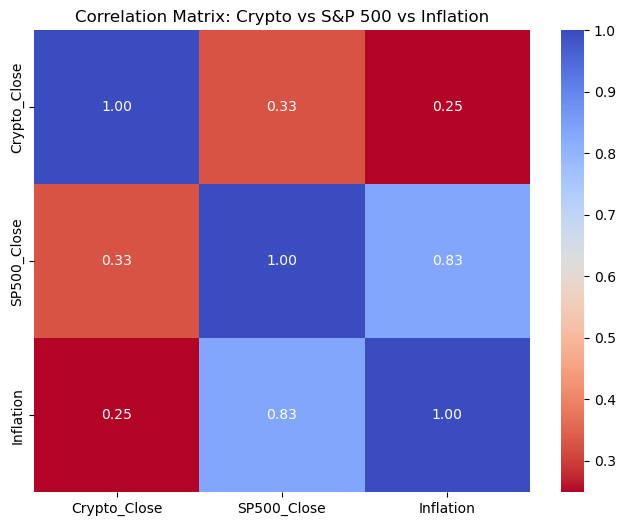

In [17]:
# Select relevant columns for correlation analysis
correlation_data = merged_data[['close_crypto', 'close_sp500', 'inflation']]

# Rename columns for clarity
correlation_data.columns = ['Crypto_Close', 'SP500_Close', 'Inflation']

# Calculate correlation matrix
correlation_matrix = correlation_data.corr()
print(correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm_r', fmt='.2f')
plt.title('Correlation Matrix: Crypto vs S&P 500 vs Inflation')
plt.show()

correlation analysis filtered just on Bitcoin

      slug symbol     name       date  ranknow  open_crypto  high_crypto  \
0  bitcoin    BTC  Bitcoin 2015-01-01        1       320.43       320.43   
1  bitcoin    BTC  Bitcoin 2015-01-02        1       314.08       315.84   
2  bitcoin    BTC  Bitcoin 2015-01-03        1       314.85       315.15   
3  bitcoin    BTC  Bitcoin 2015-01-04        1       281.15       287.23   
4  bitcoin    BTC  Bitcoin 2015-01-05        1       265.08       278.34   

   low_crypto  close_crypto  volume_crypto        market  close_ratio  spread  \
0      314.00        314.25      8036550.0  4.297536e+09       0.0389    6.43   
1      313.57        315.03      7860650.0  4.309551e+09       0.6432    2.27   
2      281.08        281.08     33054400.0  3.846270e+09       0.0000   34.07   
3      257.61        264.20     55629100.0  3.616321e+09       0.2225   29.62   
4      265.08        274.47     43962800.0  3.758098e+09       0.7081   13.26   

  Ticker  open_sp500  high_sp500  low_sp500  close_sp500

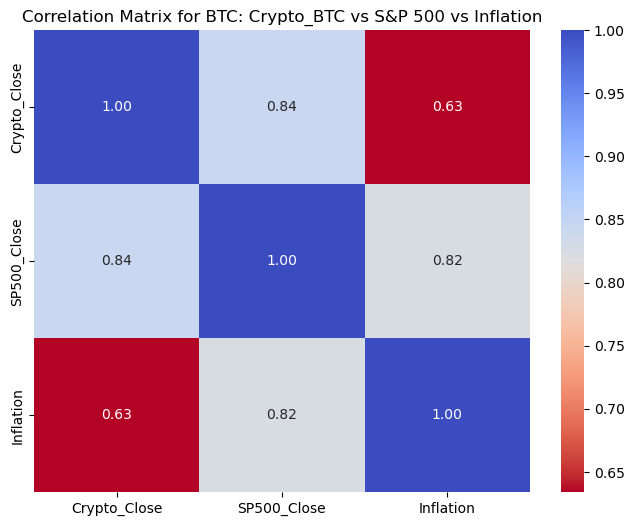

In [18]:
# List of cryptocurrency symbols to filter
BTC_filter = ['BTC']

# Filter the dataset
merged_data_BTC = merged_data[merged_data['symbol'].isin(BTC_filter)]

# Display the filtered data
print(merged_data_BTC.head())

# Select relevant columns for correlation analysis
correlation_data_BTC = merged_data_BTC[['close_crypto', 'close_sp500', 'inflation']]

# Rename columns for clarity
correlation_data_BTC.columns = ['Crypto_Close', 'SP500_Close', 'Inflation']

# Calculate correlation matrix
correlation_matrix_BTC = correlation_data_BTC.corr()
print(correlation_matrix_BTC)

import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_BTC, annot=True, cmap='coolwarm_r', fmt='.2f')
plt.title('Correlation Matrix for BTC: Crypto_BTC vs S&P 500 vs Inflation')
plt.show()

correlation analysis filtered just on USDT

        slug symbol    name       date  ranknow  open_crypto  high_crypto  \
5498  tether   USDT  Tether 2015-02-25        8     1.210000     1.220000   
5499  tether   USDT  Tether 2015-02-26        8     1.210000     1.210000   
5500  tether   USDT  Tether 2015-03-02        8     0.571249     0.607890   
5501  tether   USDT  Tether 2015-03-03        8     0.605129     0.606229   
5502  tether   USDT  Tether 2015-03-06        8     1.000000     1.000000   

      low_crypto  close_crypto  volume_crypto    market  close_ratio  spread  \
5498    1.210000      1.210000            6.0  304713.0       0.0000    0.01   
5499    1.190000      1.210000            6.0  303364.0       1.0000    0.02   
5500    0.568314      0.606502            3.0  152596.0       0.9649    0.04   
5501    0.604416      0.606229            3.0  152527.0       1.0000    0.00   
5502    1.000000      1.000000           93.0  251600.0       0.0000    0.00   

     Ticker  open_sp500  high_sp500  low_sp500  close_sp

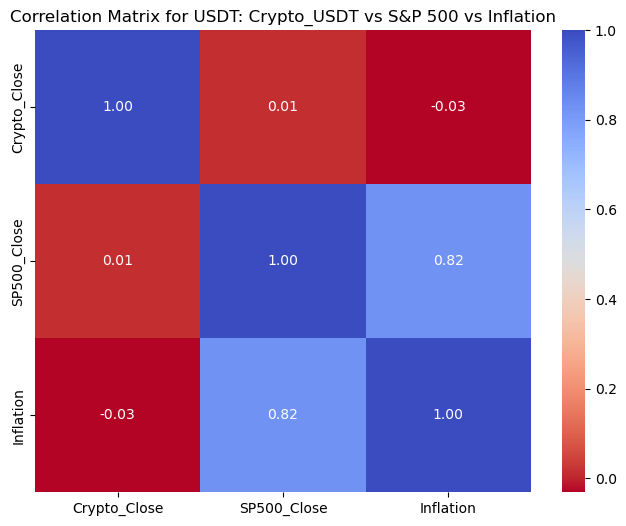

In [19]:
# List of cryptocurrency symbols to filter
USDT_filter = ['USDT']

# Filter the dataset
merged_data_USDT = merged_data[merged_data['symbol'].isin(USDT_filter)]

# Display the filtered data
print(merged_data_USDT.head())

# Select relevant columns for correlation analysis
correlation_data_USDT = merged_data_USDT[['close_crypto', 'close_sp500', 'inflation']]

# Rename columns for clarity
correlation_data_USDT.columns = ['Crypto_Close', 'SP500_Close', 'Inflation']

# Calculate correlation matrix
correlation_matrix_USDT = correlation_data_USDT.corr()
print(correlation_matrix_USDT)

import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_USDT, annot=True, cmap='coolwarm_r', fmt='.2f')
plt.title('Correlation Matrix for USDT: Crypto_USDT vs S&P 500 vs Inflation')
plt.show()

correlation analysis filtered just on ETH

          slug symbol      name       date  ranknow  open_crypto  high_crypto  \
2858  ethereum    ETH  Ethereum 2015-08-07        3     2.830000     3.540000   
2859  ethereum    ETH  Ethereum 2015-08-08        3     2.790000     2.800000   
2860  ethereum    ETH  Ethereum 2015-08-09        3     0.706136     0.879810   
2861  ethereum    ETH  Ethereum 2015-08-10        3     0.713989     0.729854   
2862  ethereum    ETH  Ethereum 2015-08-11        3     0.708087     1.130000   

      low_crypto  close_crypto  volume_crypto       market  close_ratio  \
2858    2.520000      2.770000       164329.0  166610555.0       0.2451   
2859    0.714725      0.753325       674188.0   45486894.0       0.0185   
2860    0.629191      0.701897       532170.0   42399573.0       0.2901   
2861    0.636546      0.708448       405283.0   42818364.0       0.7706   
2862    0.663235      1.070000      1463100.0   64569288.0       0.8715   

      spread Ticker  open_sp500  high_sp500  low_sp500  close_

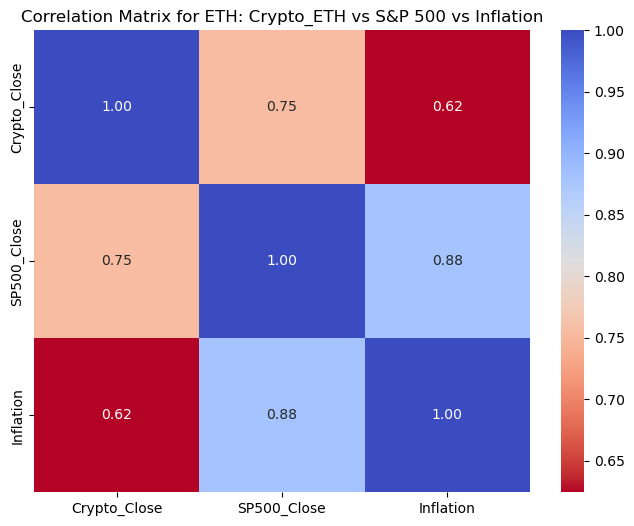

In [20]:
# List of cryptocurrency symbols to filter
ETH_filter = ['ETH']

# Filter the dataset
merged_data_ETH = merged_data[merged_data['symbol'].isin(ETH_filter)]

# Display the filtered data
print(merged_data_ETH.head())

# Select relevant columns for correlation analysis
correlation_data_ETH = merged_data_ETH[['close_crypto', 'close_sp500', 'inflation']]

# Rename columns for clarity
correlation_data_ETH.columns = ['Crypto_Close', 'SP500_Close', 'Inflation']

# Calculate correlation matrix
correlation_matrix_ETH = correlation_data_ETH.corr()
print(correlation_matrix_ETH)

import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_ETH, annot=True, cmap='coolwarm_r', fmt='.2f')
plt.title('Correlation Matrix for ETH: Crypto_ETH vs S&P 500 vs Inflation')
plt.show()

correlation analysis filtered just on XRP

        slug symbol name       date  ranknow  open_crypto  high_crypto  \
1429  ripple    XRP  XRP 2015-01-01        2     0.024455     0.024455   
1430  ripple    XRP  XRP 2015-01-02        2     0.024377     0.024423   
1431  ripple    XRP  XRP 2015-01-03        2     0.024297     0.024317   
1432  ripple    XRP  XRP 2015-01-04        2     0.022100     0.022142   
1433  ripple    XRP  XRP 2015-01-05        2     0.018943     0.020316   

      low_crypto  close_crypto  volume_crypto       market  close_ratio  \
1429    0.024205      0.024390       399022.0  755558352.0       0.7400   
1430    0.024309      0.024318       459956.0  753340322.0       0.0789   
1431    0.022106      0.022106      2171040.0  684798233.0       0.0000   
1432    0.018828      0.018928      3801010.0  586349910.0       0.0302   
1433    0.018890      0.020316      3051930.0  629350576.0       1.0000   

      spread Ticker  open_sp500  high_sp500  low_sp500  close_sp500  \
1429     0.0    VOO      190.75  

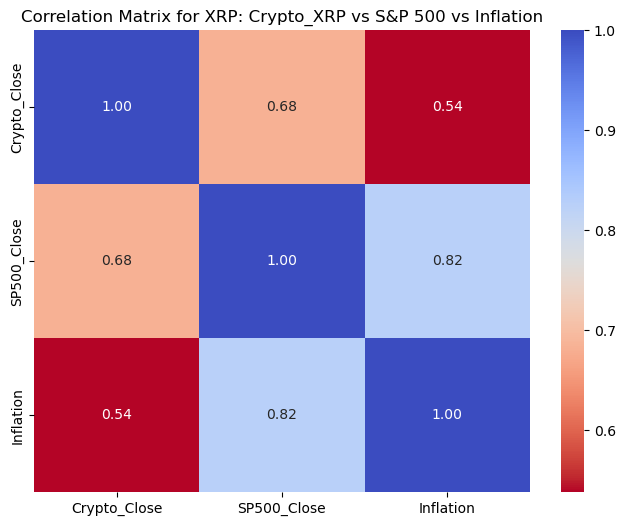

In [21]:
# List of cryptocurrency symbols to filter
XRP_filter = ['XRP']

# Filter the dataset
merged_data_XRP = merged_data[merged_data['symbol'].isin(XRP_filter)]

# Display the filtered data
print(merged_data_XRP.head())

# Select relevant columns for correlation analysis
correlation_data_XRP = merged_data_XRP[['close_crypto', 'close_sp500', 'inflation']]

# Rename columns for clarity
correlation_data_XRP.columns = ['Crypto_Close', 'SP500_Close', 'Inflation']

# Calculate correlation matrix
correlation_matrix_XRP = correlation_data_XRP.corr()
print(correlation_matrix_XRP)

import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_XRP, annot=True, cmap='coolwarm_r', fmt='.2f')
plt.title('Correlation Matrix for XRP: Crypto_XRP vs S&P 500 vs Inflation')
plt.show()

correlation analysis filtered just on LTC

          slug symbol      name       date  ranknow  open_crypto  high_crypto  \
4069  litecoin    LTC  Litecoin 2015-01-01        7         2.72         2.72   
4070  litecoin    LTC  Litecoin 2015-01-02        7         2.70         2.70   
4071  litecoin    LTC  Litecoin 2015-01-03        7         2.67         2.67   
4072  litecoin    LTC  Litecoin 2015-01-04        7         2.11         2.15   
4073  litecoin    LTC  Litecoin 2015-01-05        7         1.96         2.16   

      low_crypto  close_crypto  volume_crypto      market  close_ratio  \
4069        2.69          2.70       770693.0  95086868.0       0.3333   
4070        2.66          2.67       855392.0  94048724.0       0.2500   
4071        2.13          2.13      5193080.0  75275386.0       0.0000   
4072        1.91          1.96      3888140.0  69101043.0       0.2083   
4073        1.96          2.08     10649500.0  73586957.0       0.6000   

      spread Ticker  open_sp500  high_sp500  low_sp500  close_sp500 

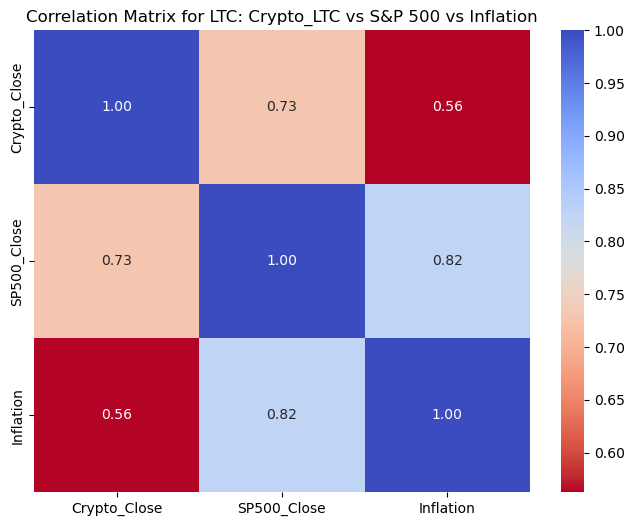

In [22]:
# List of cryptocurrency symbols to filter
LTC_filter = ['LTC']

# Filter the dataset
merged_data_LTC = merged_data[merged_data['symbol'].isin(LTC_filter)]

# Display the filtered data
print(merged_data_LTC.head())

# Select relevant columns for correlation analysis
correlation_data_LTC = merged_data_LTC[['close_crypto', 'close_sp500', 'inflation']]

# Rename columns for clarity
correlation_data_LTC.columns = ['Crypto_Close', 'SP500_Close', 'Inflation']

# Calculate correlation matrix
correlation_matrix_LTC = correlation_data_LTC.corr()
print(correlation_matrix_LTC)

import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_LTC, annot=True, cmap='coolwarm_r', fmt='.2f')
plt.title('Correlation Matrix for LTC: Crypto_LTC vs S&P 500 vs Inflation')
plt.show()

For the period from 2015-01-01 to 2018-11-30, the correlation between cryptocurrency market data, the S&P 500 index, and inflation data appears to be weak or even negative. While traditional financial markets, represented by the S&P 500, are influenced by macroeconomic factors like interest rates and inflation, the cryptocurrency market operates largely independently, driven by factors such as speculation, technological advancements, regulatory changes, and adoption trends. During this period, Bitcoin and other cryptocurrencies experienced a significant bull run (notably in 2017), while inflation and the S&P 500 followed more stable trends. The divergence suggests that cryptocurrencies did not behave as a traditional hedge against inflation or closely track stock market movements, reinforcing their position as an alternative asset class rather than a direct reflection of traditional economic indicators.

#### Data loading, Data Exploring, Data cleaning, Data Wrangling - Eromosele

#### Data Splitting, Feature Engineering - Sree

#### Model Training - Max

#### Model Optimization - Lakshaya